<a href="https://colab.research.google.com/github/AkangkhaMitra/AkangkhaMitra/blob/main/TitanicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
import io

In [ ]:
train=pd.read_csv('train.csv')

In [ ]:
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
##statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
##datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Exploratory Data Analysis**

Text(0, 0.5, 'Count')

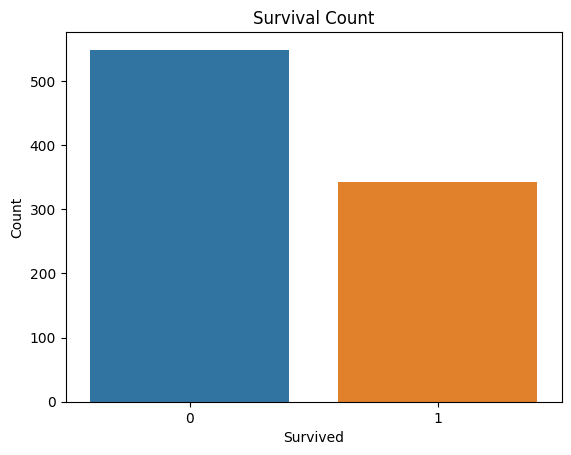

In [ ]:
##categorical Attributes
sns.countplot(data=train,x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

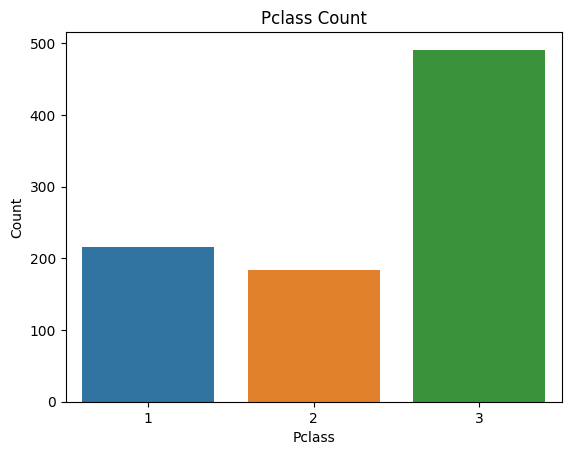

In [ ]:
##categorical Attributes
sns.countplot(data=train,x='Pclass')
plt.title('Pclass Count')
plt.xlabel('Pclass')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

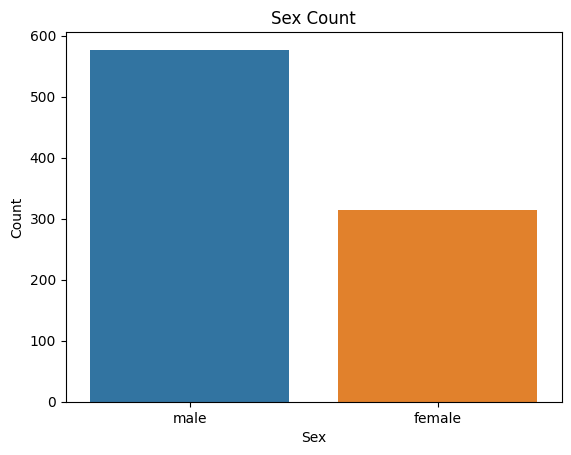

In [ ]:
##categorical Attributes
sns.countplot(data=train,x='Sex')
plt.title('Sex Count')
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

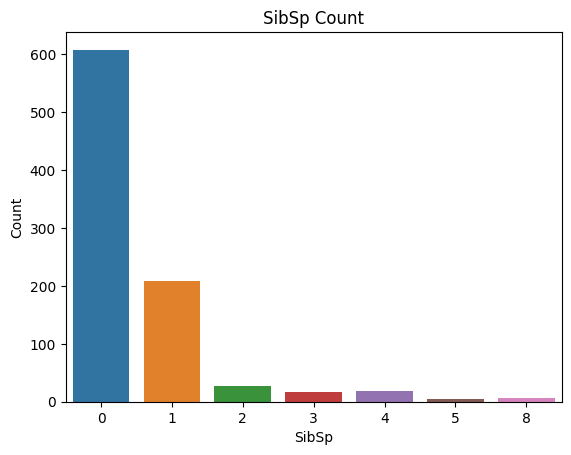

In [ ]:
##categorical Attributes
sns.countplot(data=train,x='SibSp')
plt.title('SibSp Count')
plt.xlabel('SibSp')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

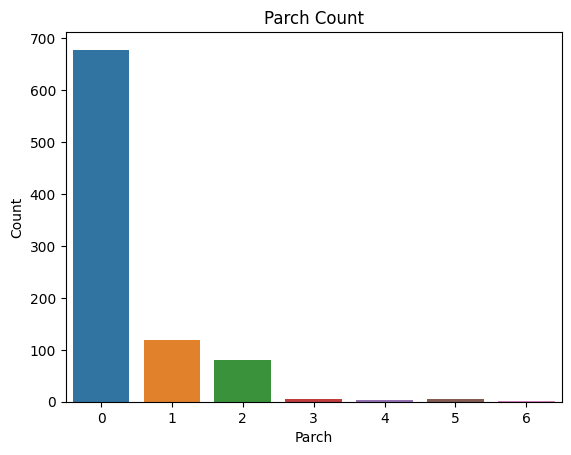

In [ ]:
##categorical Attributes
sns.countplot(data=train,x='Parch')
plt.title('Parch Count')
plt.xlabel('Parch')
plt.ylabel('Count')

<Axes: xlabel='Age', ylabel='Density'>

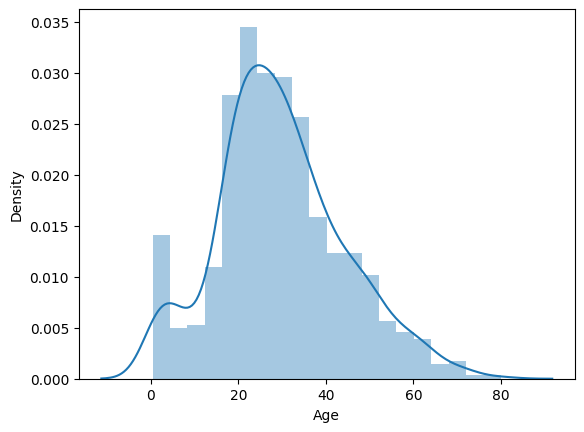

In [ ]:
##numerical attributes
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

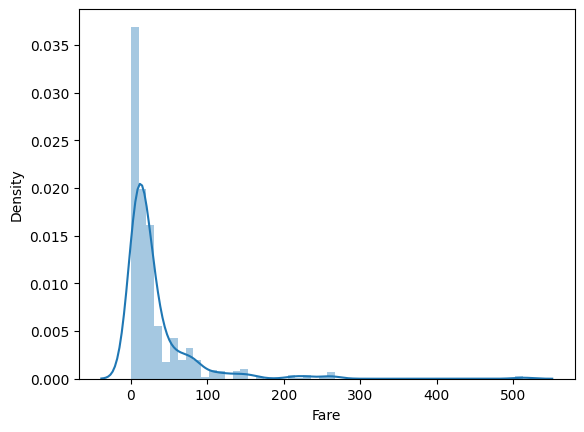

In [ ]:
##numerical attributes
sns.distplot(train['Fare'])

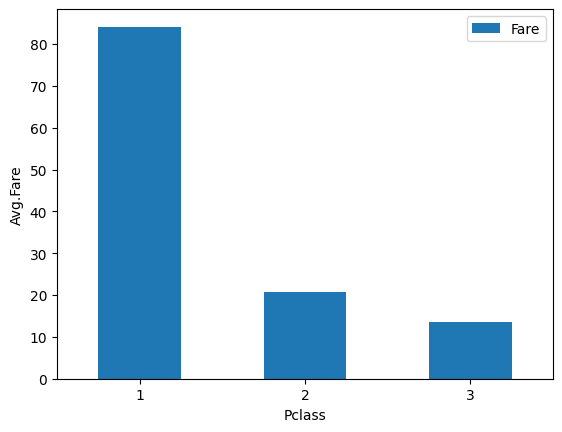

In [ ]:
class_fare = train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()

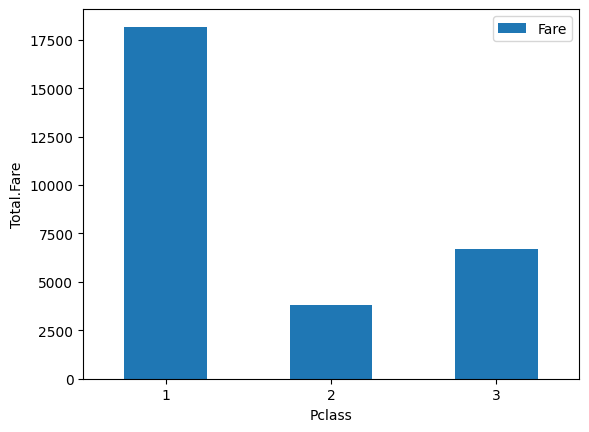

In [ ]:
class_fare = train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total.Fare')
plt.xticks(rotation=0)
plt.show()

In [ ]:
tarin_len=len(train)
#combine two dataframes
df = pd.concat([train, test],axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<Axes: xlabel='Pclass', ylabel='Fare'>

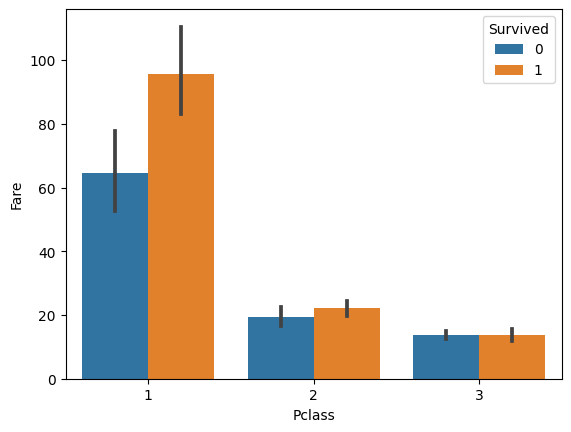

In [ ]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

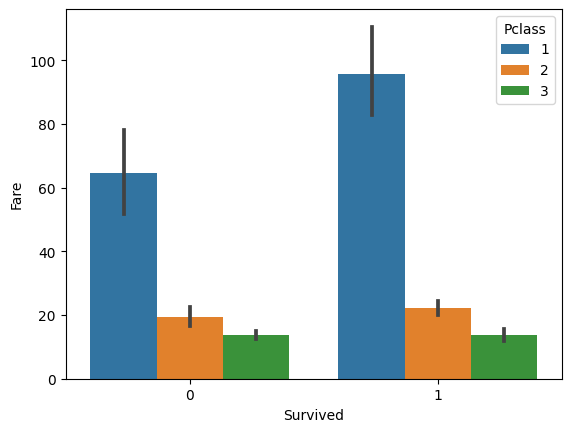

In [ ]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

# Data Preprocessing

In [ ]:
##Find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
#Drop or delete the column
df = df.drop(['Cabin'],axis=1)

In [ ]:
df['Age'].mean()

29.881137667304014

In [ ]:
df['Fare'].mean()

33.29547928134557

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
#Fill Missing Values Using Mean Of That Numerical Column
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [ ]:
#Fill Missing Values Using Mean Of That Categorical Column
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

# Log Transfomation for Uniform Data distribution

<Axes: xlabel='Fare', ylabel='Density'>

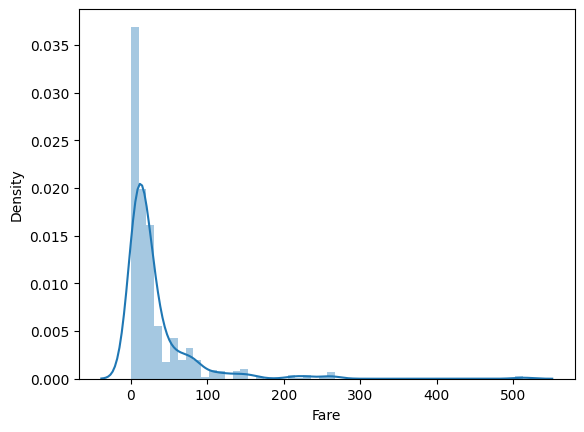

In [ ]:
sns.distplot(train['Fare'])

<Axes: xlabel='Fare', ylabel='Density'>

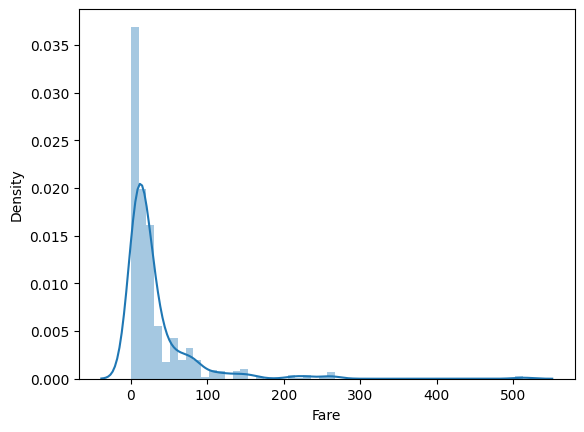

In [ ]:
sns.distplot(train['Fare'])

In [ ]:
df['Fare']=np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

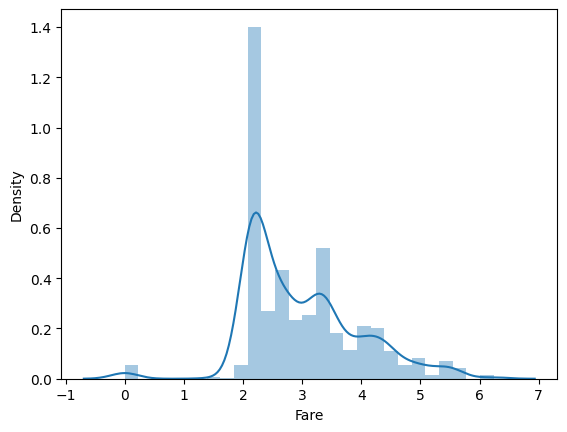

In [ ]:
sns.distplot(df['Fare'])

# Correlation Matrix

<Axes: >

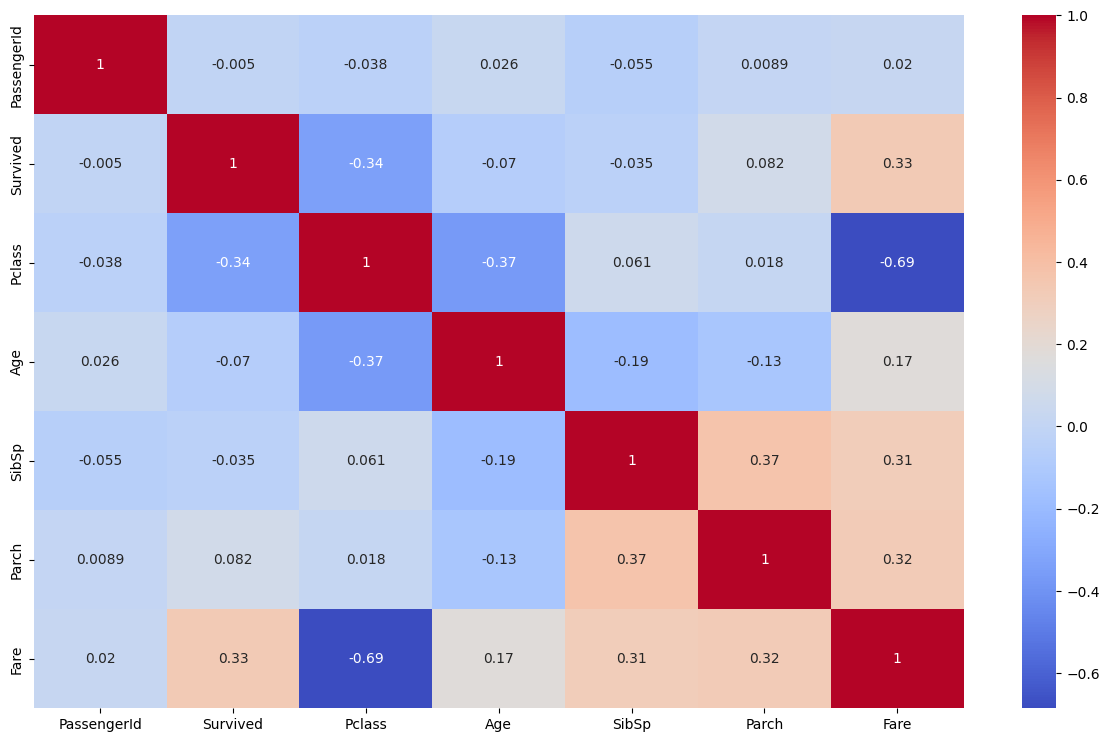

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [ ]:
## Drop The Unnecessary Columns
df = df.drop(columns=['Name', 'Ticket'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
cols=['Sex', 'Embarked']
le=LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


# Train-Test Split

In [ ]:
train_len = int(len(df) * 0.8)
train = df.iloc[:train_len, :]
test = df.iloc[:train_len, :]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [ ]:
#input Split
x = df.drop(columns=['PassengerId', 'Survived'],axis=1)
y = train['Survived']

In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Trainig

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Classify column
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))

    scores = cross_val_score(model, x, y, cv=5)
    print('CV Score:', np.mean(scores))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming x and y are loaded properly
# Ensure x and y have the same number of samples
print(len(x), len(y))
assert len(x) = len(y)
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

SyntaxError: ignored